In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DATA SCIENCE-FINALS/cleaned_data.xlsx')
df.columns = df.columns.str.strip()
df.describe()

,bankrupt,roac_before_interest_and_depreciation_before_interest,roaa_before_interest_and__after_tax,roab_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pretax_net_interest_rate,aftertax_net_interest_rate,nonindustry_income_and_expenditurerevenue,...,net_income_to_total_assets,total_assets_to_gnp_price,nocredit_interval,gross_profit_to_sales,net_income_to_stockholders_equity,liability_to_equity,degree_of_financial_leverage_dfl,interest_coverage_ratio_interest_expense_to_ebit,net_income_flag,equity_to_liability
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,...,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.0,1874.000000
mean,0.053867,0.491703,0.545992,0.540257,0.604830,0.604808,0.998914,0.797281,0.809197,0.303450,...,0.800502,1.751334e+07,0.623877,0.604827,0.839660,0.280811,0.028650,0.565100,1.0,0.040887
std,0.225815,0.052782,0.056470,0.053377,0.015304,0.015278,0.000999,0.001679,0.001818,0.001253,...,0.038968,3.718675e+08,0.011650,0.015308,0.023535,0.016238,0.027756,0.022523,0.0,0.037499
min,0.000000,0.000000,0.000000,0.000000,0.156308,0.156308,0.973424,0.752969,0.761550,0.271546,...,0.000000,0.000000e+00,0.408682,0.156309,0.000000,0.000000,0.000789,0.000000,1.0,0.008950
25%,0.000000,0.470921,0.530664,0.523047,0.599223,0.599212,0.998960,0.797360,0.809290,0.303457,...,0.792960,9.700199e-04,0.623510,0.599220,0.839801,0.277454,0.026790,0.565158,1.0,0.023025
50%,0.000000,0.493784,0.551134,0.543980,0.603828,0.603807,0.999006,0.797434,0.809351,0.303521,...,0.804713,2.425577e-03,0.623781,0.603825,0.840772,0.279384,0.026844,0.565458,1.0,0.030747
75%,0.000000,0.516672,0.571740,0.565555,0.609320,0.609331,0.999052,0.797507,0.809412,0.303574,...,0.816865,5.994230e-03,0.624104,0.609325,0.841671,0.282240,0.027065,0.566372,1.0,0.044993
max,1.000000,0.733194,0.751581,0.734622,0.665151,0.665151,0.999458,0.799953,0.811018,0.309121,...,0.895453,9.820000e+09,1.000000,0.665149,1.000000,0.745352,1.000000,1.000000,1.0,0.798122


In [ ]:
print("=" * 70)
print("DATASET OVERVIEW")
print("=" * 70)
print(f"Total observations: {df.shape}")
print(f"\nFirst few rows:")
print(df.head(3))

print(f"\nData types:")
print(df.dtypes.value_counts())

print(f"\nMissing values:")
print(df.isna().sum().sum(), "total missing values")

DATASET OVERVIEW
Total observations: (1875, 96)

First few rows:
   bankrupt  roac_before_interest_and_depreciation_before_interest  \
0         1                                           0.370594       
1         1                                           0.464291       
2         1                                           0.426071       

   roaa_before_interest_and__after_tax  \
0                             0.424389   
1                             0.538214   
2                             0.499019   

   roab_before_interest_and_depreciation_after_tax  operating_gross_margin  \
0                                         0.405750                0.601457   
1                                         0.516730                0.610235   
2                                         0.472295                0.601450   

   realized_sales_gross_margin  operating_profit_rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2

In [ ]:
# Count missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(missing_df)

                                              Column  Missing_Count  \
21                           revenue_per_share_yuan_              1   
22                  operating_profit_per_share_yuan_              1   
23             per_share_net_profit_before_tax_yuan_              1   
24           realized_sales_gross_profit_growth_rate              1   
25                      operating_profit_growth_rate              1   
..                                               ...            ...   
91                               liability_to_equity              1   
92                  degree_of_financial_leverage_dfl              1   
93  interest_coverage_ratio_interest_expense_to_ebit              1   
94                                   net_income_flag              1   
95                               equity_to_liability              1   

    Missing_Percentage  
21            0.053333  
22            0.053333  
23            0.053333  
24            0.053333  
25            0.053333

In [ ]:
# Check which columns have missing values
cols_with_missing = df.columns[df.isnull().any()].tolist()

# Option A: Drop rows with any missing values (if <5% of data)
if len(cols_with_missing) > 0 and df.isnull().sum().sum() < len(df) * 0.05:
    df_clean = df.dropna()
    print(f"Dropped {len(df) - len(df_clean)} rows with missing values")


Dropped 1 rows with missing values


In [ ]:
# Identify outliers using Interquartile Range (IQR)
def identify_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Apply to all numerical columns
outlier_counts = {}
for col in df_clean.select_dtypes(include=[np.number]).columns:
    outliers = identify_outliers_iqr(df_clean, col)
    outlier_counts[col] = outliers.sum()

# Display columns with outliers
outlier_df = pd.DataFrame(list(outlier_counts.items()),
                          columns=['Column', 'Outlier_Count'])
outlier_df = outlier_df[outlier_df['Outlier_Count'] > 0].sort_values('Outlier_Count', ascending=False)
print(outlier_df)


                              Column  Outlier_Count
71       current_asset_turnover_rate            455
49   fixed_assets_turnover_frequency            451
92  degree_of_financial_leverage_dfl            402
81            cash_flow_to_liability            357
29           total_asset_growth_rate            342
..                               ...            ...
64      current_liabilitiesliability             10
38                   net_worthassets              9
37                       debt_ratio_              9
85              liabilityassets_flag              3
56        current_assetstotal_assets              1

[90 rows x 2 columns]


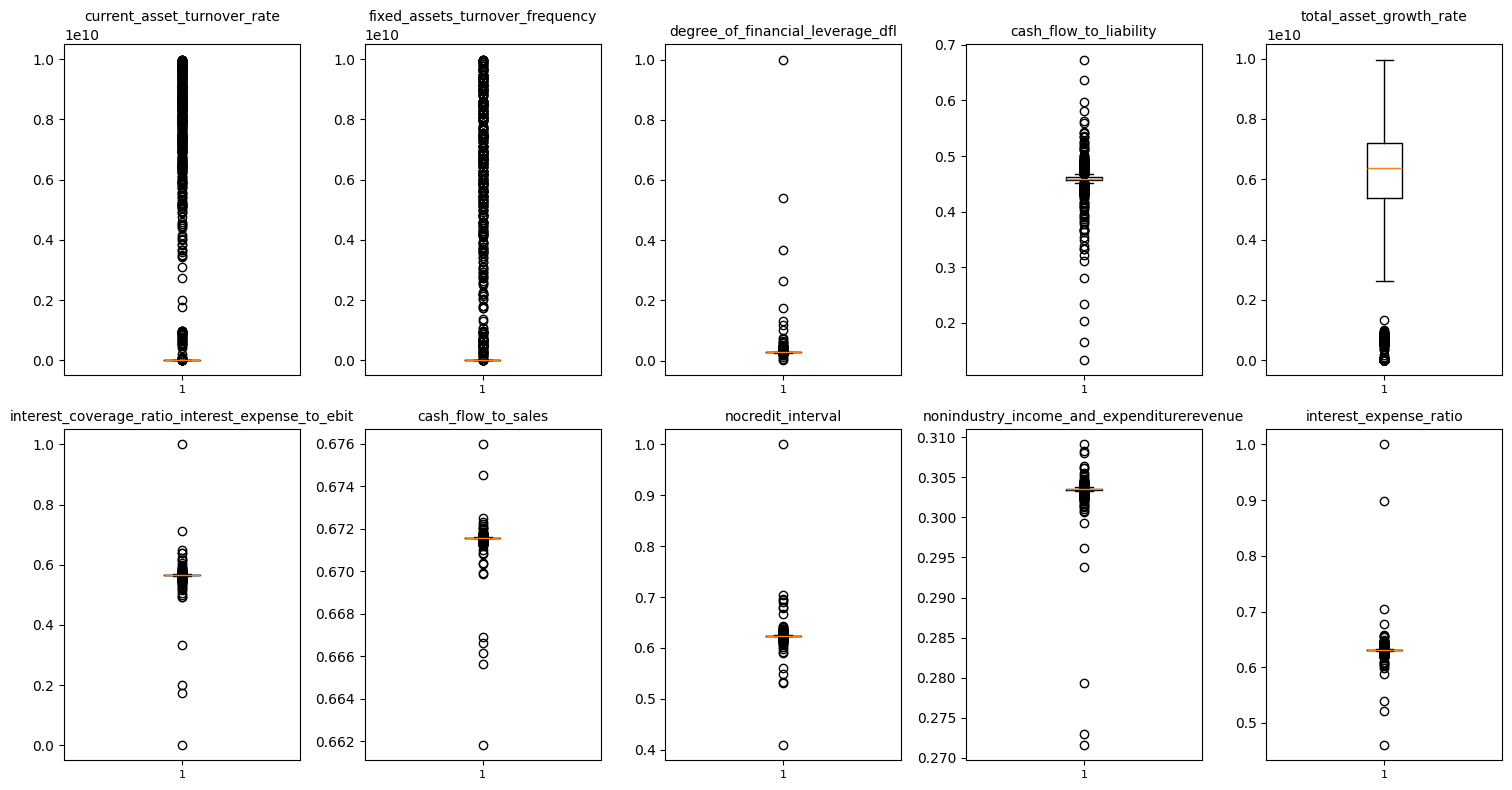

In [ ]:
# Box plot to visualize outliers for top 10 columns
top_cols_with_outliers = outlier_df.head(10)['Column'].tolist()

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(top_cols_with_outliers):
    axes[idx].boxplot(df_clean[col].dropna())
    axes[idx].set_title(col, fontsize=10)
    axes[idx].tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import mstats

df_clean_winsorized = df_clean.copy()

for col in df_clean.columns:
    # Cap values at 1st and 99th percentiles
    df_clean_winsorized[col] = mstats.winsorize(
        df_clean[col],
        limits=[0.01, 0.01]  # 1% on each tail
    )

print(f"Rows remaining: {len(df_clean_winsorized)}")
print("Extreme values capped, no rows deleted")

Rows remaining: 1874
Extreme values capped, no rows deleted


In [ ]:
# Convert to numeric if needed
for col in df_clean_winsorized.columns:
    try:
        df_clean_winsorized[col] = pd.to_numeric(df_clean_winsorized[col])
    except ValueError:
        print(f"Warning: {col} contains non-numeric values")

In [ ]:
# Replace infinite values with NaN, then handle
df_clean = df_clean_winsorized.replace([np.inf, -np.inf], np.nan)

# Check remaining NaN values
print(df_clean.isnull().sum().sum())

# If any NaN created by inf replacement, impute again
if df_clean.isnull().sum().sum() > 0:
    df_clean = df_clean.fillna(df_clean.median())

0


In [ ]:
# Identify duplicate rows
duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df_clean = df_clean.drop_duplicates()

Number of duplicate rows: 0


In [ ]:
# Check target variable distribution
target_col = 'bankrupt'

print(f"Target variable '{target_col}' distribution:")
print(df_clean[target_col].value_counts())
print(f"Bankruptcy rate: {df_clean[target_col].mean():.2%}")

# Warn if severely imbalanced
if df_clean[target_col].value_counts().min() < len(df_clean) * 0.05:
    print("⚠️ WARNING: Severe class imbalance detected")


Target variable 'bankrupt' distribution:
bankrupt
0    1773
1     101
Name: count, dtype: int64
Bankruptcy rate: 5.39%


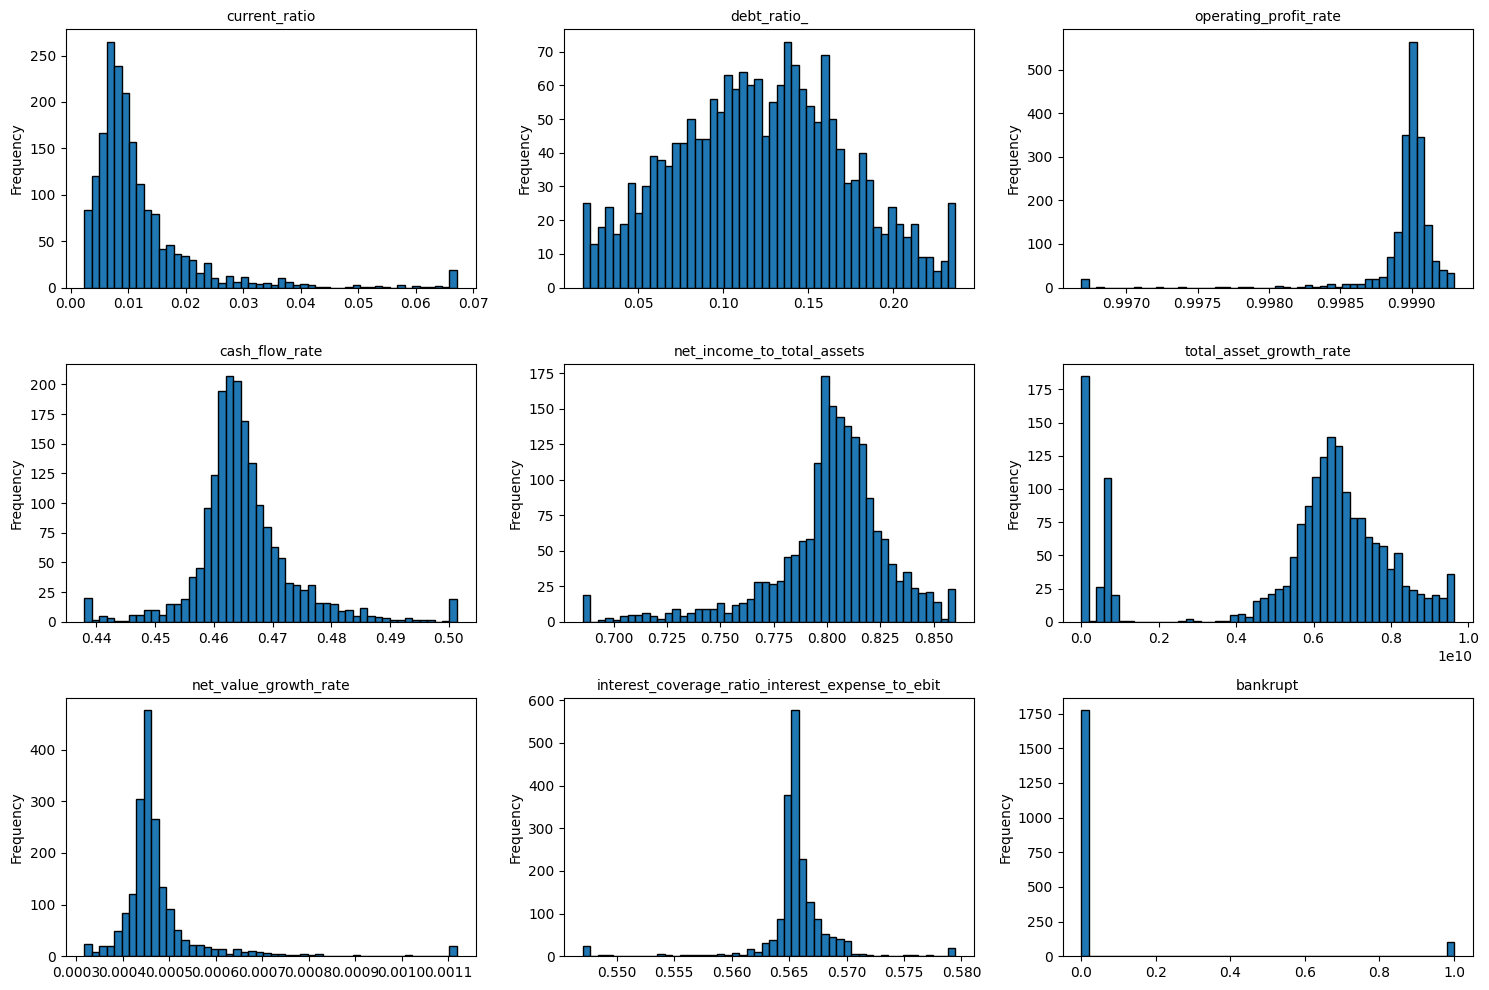

                                     Column  Skewness   Kurtosis
0                                  bankrupt  3.951129  13.611421
6                     operating_profit_rate -6.121762  44.020719
7                  pretax_net_interest_rate -4.381856  24.979421
8                aftertax_net_interest_rate -4.093404  21.467240
10       continuous_interest_rate_after_tax -4.468969  25.143508
14       interestbearing_debt_interest_rate  8.965284  79.172697
21                  revenue_per_share_yuan_  2.279873   6.780724
24  realized_sales_gross_profit_growth_rate  4.367381  25.356554
26          aftertax_net_profit_growth_rate -3.577179  24.531557
27           regular_net_profit_growth_rate -3.322208  23.343675


In [ ]:
# Plot distributions of key features
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

key_features = ['current_ratio', 'debt_ratio_', 'operating_profit_rate',
                'cash_flow_rate', 'net_income_to_total_assets',
                'total_asset_growth_rate', 'net_value_growth_rate',
                'interest_coverage_ratio_interest_expense_to_ebit', 'bankrupt']

for idx, col in enumerate(key_features):
    if col in df_clean.columns:
        axes[idx].hist(df_clean[col].dropna(), bins=50, edgecolor='black')
        axes[idx].set_title(col, fontsize=10)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check skewness and kurtosis
from scipy.stats import skew, kurtosis

skewness_data = []
for col in df_clean.select_dtypes(include=[np.number]).columns:
    s = skew(df_clean[col].dropna())
    k = kurtosis(df_clean[col].dropna())
    skewness_data.append({'Column': col, 'Skewness': s, 'Kurtosis': k})

skewness_df = pd.DataFrame(skewness_data)
print(skewness_df[abs(skewness_df['Skewness']) > 2].head(10))  # Highly skewed columns


In [ ]:
# Calculate correlation matrix
corr_matrix = df_clean.corr()

# Find highly correlated pairs (>0.95)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.95:
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

high_corr_df = pd.DataFrame(high_corr_pairs)
print(f"Highly correlated pairs ({len(high_corr_df)}):")
print(high_corr_df.head(20))

# Calculate VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = df_clean.select_dtypes(include=[np.number]).columns
vif_data['VIF'] = [variance_inflation_factor(df_clean.values, i)
                     for i in range(df_clean.shape[1])]
print("\nFeatures with high VIF (>5):")
print(vif_data[vif_data['VIF'] > 5].sort_values('VIF', ascending=False).head(15))

Highly correlated pairs (24):
                                            Feature_1  \
0   roac_before_interest_and_depreciation_before_i...   
1                 roaa_before_interest_and__after_tax   
2                 roaa_before_interest_and__after_tax   
3                              operating_gross_margin   
4                              operating_gross_margin   
5                         realized_sales_gross_margin   
6                            pretax_net_interest_rate   
7                            pretax_net_interest_rate   
8                          aftertax_net_interest_rate   
9                               net_value_per_share_b   
10                              net_value_per_share_b   
11                              net_value_per_share_a   
12            persistent_eps_in_the_last_four_seasons   
13            persistent_eps_in_the_last_four_seasons   
14                   operating_profit_per_share_yuan_   
15              per_share_net_profit_before_tax_yuan_   
1

In [ ]:
# Remove one feature from each highly correlated pair
features_to_drop = []

for _, row in high_corr_df.iterrows():
    # Keep the feature with higher correlation to target
    col1, col2 = row['Feature_1'], row['Feature_2']

    if col1 != 'bankrupt' and col2 != 'bankrupt':
        corr_to_target_1 = abs(df_clean[col1].corr(df_clean['bankrupt']))
        corr_to_target_2 = abs(df_clean[col2].corr(df_clean['bankrupt']))

        if corr_to_target_1 > corr_to_target_2:
            features_to_drop.append(col2)
        else:
            features_to_drop.append(col1)

features_to_drop = list(set(features_to_drop))  # Remove duplicates
df_clean = df_clean.drop(columns=features_to_drop)

print(f"Dropped {len(features_to_drop)} redundant features")


Dropped 19 redundant features


In [ ]:
# For tree-based models: No scaling needed
# For linear models, SVM, KNN: Scale features

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate features and target
X = df_clean.drop(columns=['bankrupt'])
y = df_clean['bankrupt']

# Option A: Standardization (mean=0, std=1) - for linear models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
# Save cleaned dataset
df_clean.to_excel('cleaned_data_final.xlsx', index=False)
df_clean.to_csv('cleaned_data_final.csv', index=False)

print("✓ Cleaned data saved to 'cleaned_data_final.xlsx'")
print(f"✓ Final dataset shape: {df_clean.shape}")


✓ Cleaned data saved to 'cleaned_data_final.xlsx'
✓ Final dataset shape: (1874, 77)
